In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas correctamente.")

Bibliotecas importadas correctamente.


In [3]:
#cargar los datos:
url = 'https://www.statlearning.com/s/Advertising.csv'
data = pd.read_csv(url, index_col=0)


#reparamos entre features y tarjets (x,y respectivamente)
X = data[['TV']]
Y = data['sales']

print("Datos cargados y preparados. Tenemos", X.shape[0], "registros.")

Datos cargados y preparados. Tenemos 200 registros.


In [4]:
data.head

<bound method NDFrame.head of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [5]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
data.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
      dtype='int64', length=200)

In [7]:
data.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [8]:
data.describe

<bound method NDFrame.describe of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

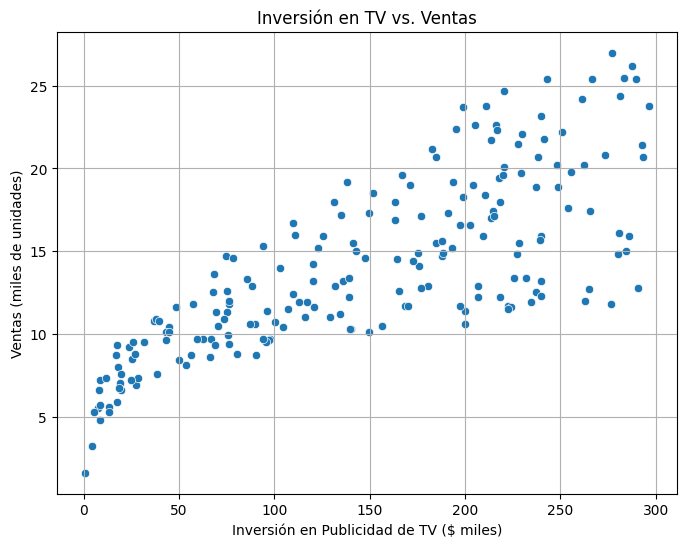

In [10]:
# Creamos el gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='sales', data=data)
plt.title('Inversión en TV vs. Ventas')
plt.xlabel('Inversión en Publicidad de TV ($ miles)')
plt.ylabel('Ventas (miles de unidades)')
plt.grid(True)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento (train): {X_train.shape[0]} registros")
print(f"Datos de prueba (test): {X_test.shape[0]} registros")

Datos de entrenamiento (train): 140 registros
Datos de prueba (test): 60 registros


In [14]:
#con eso, creamos una instancia del modelo
model = LinearRegression()

#entrenamos el modelo:
model.fit(X_train,y_train)
# Obtenemos el intercepto (beta_0) y el coeficiente (beta_1)
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"La ecuación del modelo es: Sales = {beta_0:.4f} + {beta_1:.4f} * TV")

La ecuación del modelo es: Sales = 7.2395 + 0.0464 * TV


In [15]:
# Importar las funciones de métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Usar el modelo entrenado para hacer predicciones en el CONJUNTO DE PRUEBA
y_pred = model.predict(X_test)

# 2. Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 3. Imprimir los resultados
print(f"Rendimiento del modelo en el conjunto de prueba:")
print(f"---------------------------------------------")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Rendimiento del modelo en el conjunto de prueba:
---------------------------------------------
Error Absoluto Medio (MAE): 2.2759
Error Cuadrático Medio (MSE): 8.9710
Raíz del Error Cuadrático Medio (RMSE): 2.9952
Coeficiente de Determinación (R²): 0.6714


In [ ]:
# ===================================================================================
# MENTOR ÁUREO - RESUMEN TEÓRICO: FUNDAMENTOS DEL APRENDIZAJE SUPERVISADO
# ===================================================================================
#
# Este bloque resume los conceptos teóricos clave aplicados en esta sesión de
# entrenamiento para un problema de Regresión Lineal Simple.
#
# ---
#
# 1. FORMULACIÓN DEL PROBLEMA Y LA HIPÓTESIS DEL MODELO
# ----------------------------------------------------
# El punto de partida es la hipótesis de que existe una relación funcional
# entre una feature (X) y un target (Y). Para la Regresión Lineal,
# asumimos que esta relación es lineal.
#
# Ecuación del modelo: Y_hat = beta_0 + beta_1 * X
#
# - Y_hat: El valor predicho por el modelo.
# - beta_0: El intercepto; el valor base de Y cuando X es cero.
# - beta_1: El coeficiente; el cambio en Y por cada unidad de cambio en X.
# - El objetivo del "aprendizaje" es encontrar los mejores valores para beta_0 y beta_1.
#
# ---
#
# 2. APRENDIZAJE A TRAVÉS DE LA OPTIMIZACIÓN
# ---------------------------------------------
# El entrenamiento de un modelo es un problema de optimización. Buscamos los
# parámetros que minimizan una 'función de coste' (una medida de error).
#
# - Función de Coste (para Regresión Lineal): Suma de los Cuadrados de los
#   Residuos (RSS - Residual Sum of Squares).
#
# - Fórmula: RSS = sum( (y_real - y_predicho)^2 )
#
# El algoritmo de Mínimos Cuadrados Ordinarios (OLS) es el proceso matemático
# que encuentra los valores de beta_0 y beta_1 que minimizan este RSS.
#
# ---
#
# 3. EL PRINCIPIO DE GENERALIZACIÓN
# -----------------------------------
# Un modelo solo es útil si funciona bien en datos que no ha visto antes.
# Esta capacidad se llama 'generalización'.
#
# - Problema a Evitar: Sobreajuste (Overfitting), que ocurre cuando un modelo
#   "memoriza" los datos de entrenamiento pero no logra generalizar a datos nuevos.
#
# - Solución Metodológica: Particionar los datos en un 'conjunto de entrenamiento'
#   (para que el modelo aprenda) y un 'conjunto de prueba' (para evaluar de
#   forma honesta su capacidad de generalización).
#
# ---
#
# 4. EVALUACIÓN CUANTITATIVA DEL MODELO
# ----------------------------------------
# Medimos el rendimiento del modelo en el conjunto de prueba con métricas objetivas.
#
# - Métricas de Magnitud del Error (MAE, RMSE): Miden la PRECISIÓN.
#   Responden a: ¿Cuál es la magnitud promedio del error de predicción?
#   (Ej: "El modelo se equivoca en promedio por 2,200 unidades").
#
# - Métricas de Poder Explicativo (R²): Miden la CALIDAD DEL AJUSTE.
#   Responden a: ¿Qué porcentaje de la variabilidad en el target es
#   explicado por nuestro modelo?
#   (Ej: "El 60% de las variaciones en ventas se explican por la inversión en TV").
#
# Un R² bajo sugiere que la hipótesis del modelo es incompleta y que se necesitan
# más features para explicar mejor el fenómeno, lo que nos lleva a la
# Regresión Lineal Múltiple.
#
# ===================================================================================